<a href="https://colab.research.google.com/github/ankitg-02/extern/blob/main/Webacy_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats import pointbiserialr
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist,squareform
from scipy.cluster.hierarchy import fcluster

In [2]:
data=pd.read_excel("/content/compiled_risk_data (1).xlsx")
Webacy=pd.DataFrame(data)
Webacy.head()

,project_name,Smart contract address,Blog post link,Audit website,Chain,Is_closed_source,hidden_owner,anti_whale_modifiable,Is_anti_whale,Is_honeypot,...,centralized_risk_high,centralized_risk_low,event_setter,external_dependencies,immutable_states,reentrancy_without_eth_transfer,incorrect_inheritance_order,shadowing_local,events_maths,Summary/rationale of risk tags marked true
0,Data Analytics,384571416209d08623c6ace9422613fc8970475d,https://chainsecurity.com/security-audit/circl...,https://chainsecurity.com,Ethereum,False,False,False,False,False,...,0.0,0.0,True,True,True,True,False,False,False,Bad Contract: Assigned for flaws that indicate...
1,Data Analytics,0xAb5801a7D398351b8bE11C439e05C5B3259ae9B,https://stackoverflow.com/questions/75030483/w...,https://studygroup.moralis.io/t/compilation-er...,Ethereum,False,False,True,True,False,...,0.0,1.0,False,True,False,False,True,False,True,Summary/rationale of risk tags marked true: Th...
2,Data Analytics,0x4B20993Bc481177ec7E8f571ceCaE8A9e22C02db,https://stackoverflow.com/questions/71115106/s...,https://ethereum.stackexchange.com/questions/1...,Ethereum,True,False,False,True,False,...,0.0,1.0,False,True,False,False,False,True,True,NaN
3,Data Analytics,0x78731D3Ca6b7E34aC0F824c42a7cC18A495cabaB,https://stackoverflow.com/questions/75030483/w...,https://studygroup.moralis.io/t/compilation-er...,Ethereum,True,False,False,False,True,...,0.0,1.0,False,False,True,True,False,False,True,NaN
4,Data Analytics,0x617F2E2fD72FD9D5503197092aC168c91465E7f2,https://stackoverflow.com/questions/69466137/h...,https://ethereum.stackexchange.com/questions/1...,Ethereum,True,False,True,False,True,...,0.0,0.0,True,True,False,True,False,False,True,The smart contract is marked with risks such a...


In [3]:
Webacy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 967 entries, 0 to 966
Data columns (total 38 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   project_name                                967 non-null    object 
 1   Smart contract address                      967 non-null    object 
 2   Blog post link                              967 non-null    object 
 3   Audit website                               967 non-null    object 
 4   Chain                                       967 non-null    object 
 5   Is_closed_source                            967 non-null    bool   
 6   hidden_owner                                967 non-null    bool   
 7   anti_whale_modifiable                       967 non-null    bool   
 8   Is_anti_whale                               967 non-null    bool   
 9   Is_honeypot                                 967 non-null    bool   
 10  buy_tax       

In [4]:
for i in Webacy.columns[5:36]:
  print(Webacy[i].value_counts())

Is_closed_source
False    821
True     146
Name: count, dtype: int64
hidden_owner
False    817
True     150
Name: count, dtype: int64
anti_whale_modifiable
False    855
True     112
Name: count, dtype: int64
Is_anti_whale
False    829
True     138
Name: count, dtype: int64
Is_honeypot
False    878
True      89
Name: count, dtype: int64
buy_tax
False    850
True     117
Name: count, dtype: int64
sell_tax
False    848
True     119
Name: count, dtype: int64
slippage_modifiable
False    828
True     139
Name: count, dtype: int64
Is_blacklisted
False    891
True      76
Name: count, dtype: int64
can_take_back_ownership
False    786
True     181
Name: count, dtype: int64
owner_change_balance
False    763
True     204
Name: count, dtype: int64
is_airdrop_scam
False    902
True      65
Name: count, dtype: int64
selfdestruct
False    856
True     111
Name: count, dtype: int64
trust_list
False    827
True     140
Name: count, dtype: int64
is_whitelisted
False    861
True     106
Name: count, dty

In [5]:
risk_columns=[]
for i in Webacy.columns[5:36]:
  risk_columns.append(i)
print(risk_columns)

['Is_closed_source', 'hidden_owner', 'anti_whale_modifiable', 'Is_anti_whale', 'Is_honeypot', 'buy_tax', 'sell_tax', 'slippage_modifiable', 'Is_blacklisted', 'can_take_back_ownership', 'owner_change_balance', 'is_airdrop_scam', 'selfdestruct', 'trust_list', 'is_whitelisted', 'is_fake_token', 'illegal_unicode', 'exploitation', 'bad_contract', 'reusing_state_variable', 'encode_packed_collision', 'encode_packed_parameters', 'centralized_risk_medium', 'centralized_risk_high', 'centralized_risk_low', 'event_setter', 'external_dependencies', 'immutable_states', 'reentrancy_without_eth_transfer', 'incorrect_inheritance_order', 'shadowing_local']


In [6]:
frequencies=[]
for i in Webacy.columns[5:36]:
  try:
    frequencies.append(Webacy[i].value_counts().loc[True])
  except KeyError:
    frequencies.append(0)
print(frequencies)

[146, 150, 112, 138, 89, 117, 119, 139, 76, 181, 204, 65, 111, 140, 106, 87, 63, 437, 0, 0, 0, 0, 0, 0, 0, 140, 291, 145, 190, 96, 79]


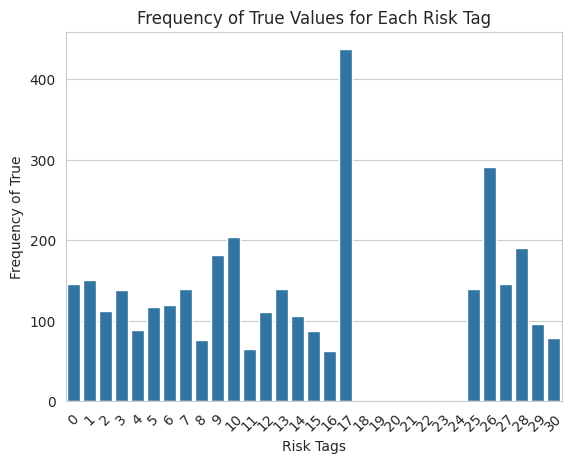

In [7]:
sns.set_style("whitegrid")
frequencies = pd.Series(frequencies)
sns.barplot(x=frequencies.index, y=frequencies.values)
plt.title('Frequency of True Values for Each Risk Tag')
plt.xlabel('Risk Tags')
plt.ylabel('Frequency of True')
plt.xticks(rotation=45)
plt.show()

In [8]:
def phi_coefficient(x, y):
  contigency_table=pd.crosstab(x, y)
  ch2=scipy.stats.chi2_contingency(contigency_table,correction=False)[0]
  n=np.sum(np.sum(contigency_table))
  phi=np.sqrt(ch2/n)
  return phi
phi = phi_coefficient(x=Webacy['Is_honeypot'], y=Webacy['anti_whale_modifiable'])
print(f"Phi Coefficient between 'Is_honeypot' and 'anti_whale_modifiable': {phi}")

Phi Coefficient between 'Is_honeypot' and 'anti_whale_modifiable': 0.4437039256424274


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


In [9]:
phi_matrix=pd.DataFrame(index=risk_columns,columns=risk_columns)
for i in risk_columns:
  for j in risk_columns:
    phi_matrix.loc[i,j]=phi_coefficient(x=Webacy[i],y=Webacy[j])
print("Phi Coefficients calculated for all pairs of variables:")
phi_matrix

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

Phi Coefficients calculated for all pairs of variables:


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

,Is_closed_source,hidden_owner,anti_whale_modifiable,Is_anti_whale,Is_honeypot,buy_tax,sell_tax,slippage_modifiable,Is_blacklisted,can_take_back_ownership,...,encode_packed_parameters,centralized_risk_medium,centralized_risk_high,centralized_risk_low,event_setter,external_dependencies,immutable_states,reentrancy_without_eth_transfer,incorrect_inheritance_order,shadowing_local
Is_closed_source,1.0,0.369825,0.343793,0.315152,0.395294,0.321812,0.387156,0.395293,0.338371,0.271559,...,0.404146,0.155005,0.217354,0.222421,0.360043,0.132648,0.275936,0.249433,0.342951,0.369848
hidden_owner,0.369825,1.0,0.371578,0.356021,0.328014,0.454177,0.422091,0.418828,0.299462,0.372939,...,0.334362,0.204905,0.332364,0.207183,0.302669,0.129919,0.228094,0.262604,0.335381,0.299793
anti_whale_modifiable,0.343793,0.371578,1.0,0.536006,0.443704,0.460264,0.523498,0.625441,0.33861,0.339978,...,0.42708,0.231735,0.346207,0.180772,0.374556,0.185268,0.300558,0.309001,0.36614,0.411167
Is_anti_whale,0.315152,0.356021,0.536006,1.0,0.371245,0.501367,0.513153,0.507013,0.342278,0.281739,...,0.410169,0.219838,0.294004,0.199763,0.336262,0.170635,0.383476,0.274457,0.34901,0.385632
Is_honeypot,0.395294,0.328014,0.443704,0.371245,1.0,0.386469,0.414324,0.389585,0.478634,0.287442,...,0.484765,0.19187,0.224287,0.275755,0.367158,0.212279,0.387316,0.31973,0.45656,0.440523
buy_tax,0.321812,0.454177,0.460264,0.501367,0.386469,1.0,0.710463,0.444537,0.339422,0.326003,...,0.368493,0.239542,0.291784,0.220048,0.288925,0.157569,0.359325,0.255471,0.354019,0.38716
sell_tax,0.387156,0.422091,0.523498,0.513153,0.414324,0.710463,1.0,0.465644,0.381907,0.272188,...,0.363909,0.291278,0.310494,0.23208,0.328965,0.179746,0.354068,0.337649,0.328301,0.42844
slippage_modifiable,0.395293,0.418828,0.625441,0.507013,0.389585,0.444537,0.465644,1.0,0.285621,0.362606,...,0.429328,0.237516,0.329007,0.244272,0.384301,0.206749,0.315036,0.346361,0.346984,0.415881
Is_blacklisted,0.338371,0.299462,0.33861,0.342278,0.478634,0.339422,0.381907,0.285621,1.0,0.244082,...,0.452629,0.157359,0.333584,0.177963,0.36036,0.185408,0.29712,0.26178,0.378526,0.432002
can_take_back_ownership,0.271559,0.372939,0.339978,0.281739,0.287442,0.326003,0.272188,0.362606,0.244082,1.0,...,0.342887,0.243507,0.36217,0.216989,0.292306,0.136021,0.303422,0.223104,0.354918,0.311808


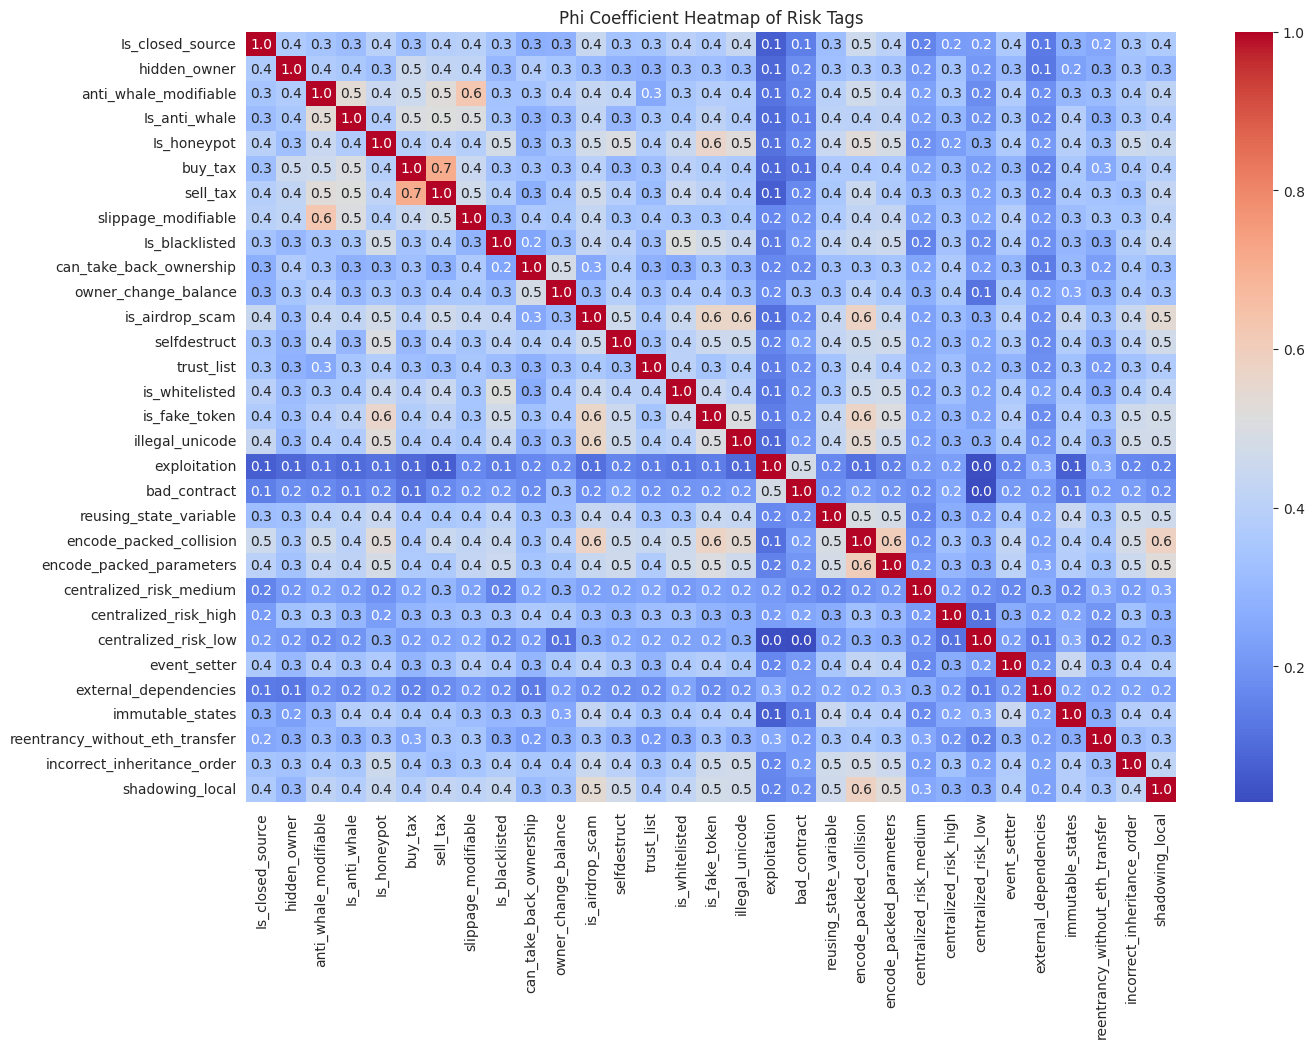

In [10]:
phi_matrix = phi_matrix.astype(float)
plt.figure(figsize=(15, 10))
sns.heatmap(phi_matrix, annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Phi Coefficient Heatmap of Risk Tags')
plt.show()

In [14]:
data_col=Webacy.columns[2:36]

In [23]:
data_col.delete((1,2))

Index(['Blog post link', 'Is_closed_source', 'hidden_owner',
       'anti_whale_modifiable', 'Is_anti_whale', 'Is_honeypot', 'buy_tax',
       'sell_tax', 'slippage_modifiable', 'Is_blacklisted',
       'can_take_back_ownership', 'owner_change_balance', 'is_airdrop_scam',
       'selfdestruct', 'trust_list', 'is_whitelisted', 'is_fake_token',
       'illegal_unicode', 'exploitation', 'bad_contract',
       'reusing_state_variable', 'encode_packed_collision',
       'encode_packed_parameters', 'centralized_risk_medium',
       'centralized_risk_high', 'centralized_risk_low', 'event_setter',
       'external_dependencies', 'immutable_states',
       'reentrancy_without_eth_transfer', 'incorrect_inheritance_order',
       'shadowing_local'],
      dtype='object')

In [32]:
data_new=data_col.copy()
f1="hidden_owner"
f2='Is_honeypot'
f3="exploitation"
selected_features=data_new[[f1,f2,f3]].replace({True:1,False:0})
print("Features selected for clustering:")
print(selected_features.head())

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices